AutoEncoder

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset
from torch.autograd import Variable
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<img src="https://blog.paperspace.com/content/images/2020/01/1_oUbsOnYKX5DEpMOK3pH_lg.png" width=600>



In [2]:

!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1_YP-yu9JxX6iuiJbzowi47HGtq-gIVCY' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1_YP-yu9JxX6iuiJbzowi47HGtq-gIVCY" -O fashion-mnist_train.csv && rm -rf /tmp/cookies.txt

--2020-09-17 18:49:15--  https://docs.google.com/uc?export=download&confirm=XLMH&id=1_YP-yu9JxX6iuiJbzowi47HGtq-gIVCY
Resolving docs.google.com (docs.google.com)... 74.125.203.101, 74.125.203.113, 74.125.203.100, ...
Connecting to docs.google.com (docs.google.com)|74.125.203.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-08-1s-docs.googleusercontent.com/docs/securesc/n7unaj85f913dg8r84ol9vimhcnpeqbl/otet8kgonu9h4j4lq2s02oclb51vhshm/1600368525000/14751957923043800851/15723177410294387979Z/1_YP-yu9JxX6iuiJbzowi47HGtq-gIVCY?e=download [following]
--2020-09-17 18:49:15--  https://doc-08-1s-docs.googleusercontent.com/docs/securesc/n7unaj85f913dg8r84ol9vimhcnpeqbl/otet8kgonu9h4j4lq2s02oclb51vhshm/1600368525000/14751957923043800851/15723177410294387979Z/1_YP-yu9JxX6iuiJbzowi47HGtq-gIVCY?e=download
Resolving doc-08-1s-docs.googleusercontent.com (doc-08-1s-docs.googleusercontent.com)... 64.233.188.132, 2404:6800:4008:c06::84
Connecting

In [3]:
train = pd.read_csv("./fashion-mnist_train.csv") # download the dataset

In [4]:
train.shape # shape of the data-set

(60000, 785)

In [10]:
train.iloc[5,:] 

label       4
pixel1      0
pixel2      0
pixel3      0
pixel4      5
           ..
pixel780    7
pixel781    5
pixel782    0
pixel783    0
pixel784    0
Name: 5, Length: 785, dtype: int64

one can see, that there are pixels that have its values not from 0 to 1. Hence, one would like to normalize values of our pixels.

### Task 1: 
You should normalize values of pixels throughout the dataset

In [12]:
X = train.iloc[:,1:] # data-set of features without the target variable
y = train.iloc[:,0].values # the target variable

X = train.iloc[:,1:].values/255 # each pixel is divided by 255 -> each  pixel \in [0,1]
X = (X - 0.5)/0.5 

X.shape,y.shape

((60000, 784), (60000,))

In [13]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size = 0.2)

In [14]:
X_train_torch = torch.from_numpy(X_train).type(torch.FloatTensor)
y_train_torch = torch.from_numpy(y_train)

X_val_torch = torch.from_numpy(X_val).type(torch.FloatTensor)
y_val_torch = torch.from_numpy(y_val)

train_dataset = TensorDataset(X_train_torch, y_train_torch)
val_dataset = TensorDataset(X_val_torch, y_val_torch)

train_dataloader = torch.utils.data.DataLoader(
    train_dataset, 
    batch_size=100,
    shuffle=False, 
    num_workers=4
)
val_dataloader = torch.utils.data.DataLoader(
    val_dataset, 
    batch_size=100,
    shuffle=False, 
    num_workers=4
)

In [16]:
def show_torch_image(torch_tensor):
    plt.imshow(torch_tensor.numpy().reshape(28, 28), cmap='gray')
    plt.show()

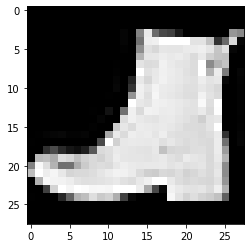

In [17]:
idx = np.random.randint(0, len(X_train_torch))
show_torch_image(X_train_torch[idx])

### Taks 2: 
Multilayer neural network for predictions

In [20]:
class Model(nn.Module):
  def __init__(self):
    super(Model,self).__init__()
    self.fc = nn.Linear(784,1000)
    self.fc2 = nn.Linear(1000,500)
    self.fc3 = nn.Linear(500,10)
  def forward(self,x):
    x.view((-1,784))
    x = F.relu(self.fc(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    return F.log_softmax(x)

In [21]:
model = Model()
optimizer = optim.Adam(model.parameters(),lr=1e-3)

In [22]:
model.train()

Model(
  (fc): Linear(in_features=784, out_features=1000, bias=True)
  (fc2): Linear(in_features=1000, out_features=500, bias=True)
  (fc3): Linear(in_features=500, out_features=10, bias=True)
)

In [24]:
num_epochs = 5
losses = []

for epoch in range(num_epochs):
  for batch_idx,(X_batch,target) in enumerate(train_dataloader):
    X_batch,target = Variable(X_batch),Variable(target)
    
    optimizer.zero_grad()
    y_pred = model(X_batch)
    loss = F.cross_entropy(y_pred,target)
    losses.append(loss.cpu().data.item())
    loss.backward()
    optimizer.step()

    if batch_idx % 100 == 1:
            print('\r Train Epoch: {}/{} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch+1,
                num_epochs,
                batch_idx * len(X_batch), 
                len(train_dataloader.dataset),
                100. * batch_idx / len(train_dataloader), 
                loss.cpu().data.item()), 
                end=''
            )
    


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  if sys.path[0] == '':


 Train Epoch: 5/5 [40100/48000 (84%)]	Loss: 0.678176

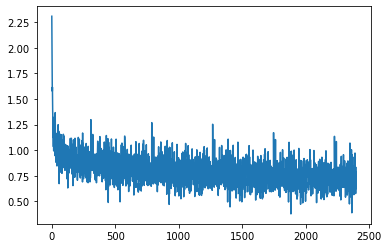

In [27]:
plt.plot(losses)

In [31]:
def eval_model( model, val_dataloader):
  model.eval()
  total_loss = 0
  with torch.no_grad():
    for batch_idx,(X_batch,target) in enumerate(val_dataloader):
      X_batch, target = Variable(X_batch),Variable(target)
      pred = model(X_batch)
      loss = F.cross_entropy(pred,target)
      total_loss += loss*X_batch.shape[0]
    avg_loss = total_loss/len(val_dataloader)
    return avg_loss.item()

In [32]:
eval_model(model,val_dataloader)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  if sys.path[0] == '':


77.8595962524414

#### Task 3: Autoencoder

In [45]:
class Autoencoder(nn.Module):
  def __init__(self):
    super(Autoencoder,self).__init__()
    #encoder
    self.e1 = nn.Linear(784,28)
    self.e2 = nn.Linear(28,250)
    #embedding
    self.lv = nn.Linear(250,10)
    #decoder
    self.d1 = nn.Linear(10,250)
    self.d2 = nn.Linear(250,500)
    self.output_layer = nn.Linear(500,784)

  def forward(self,x):
    x.view((-1,784))
    x = F.relu(self.e1(x))
    x = F.relu(self.e2(x))

    x = torch.sigmoid(self.lv(x))

    x = F.relu(self.d1(x))
    x = F.relu(self.d2(x))

    x = self.output_layer(x)
    return x

In [46]:
autoencoder = Autoencoder()
optimizer = optim.Adam(autoencoder.parameters(),lr=1e-3)

In [52]:
num_epochs = 5
losses = []
loss_func = nn.MSELoss()

for epoch in range(num_epochs):
    for batch_idx, (X_batch, target) in enumerate(train_dataloader):
        
      y_pred = autoencoder(X_batch)

      # target нас здесь не интересует - мы восстанавливаем сами изображения
      loss = loss_func(y_pred, X_batch)

      losses.append(loss.cpu().data.item())

      loss.backward()
        
      optimizer.step()
      optimizer.zero_grad()

    if batch_idx % 100 == 1:
            print('\r Train Epoch: {}/{} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch+1,
                num_epochs,
                batch_idx * len(X_batch), 
                len(train_dataloader.dataset),
                100. * batch_idx / len(train_dataloader), 
                loss.cpu().data.item()), 
                end=''
            )
    


In [53]:
autoencoder.eval()
predictions = []

for batch_idx, (data, target) in enumerate(val_dataloader):
        y_pred = autoencoder(data)
        for prediction in y_pred:
            predictions.append(prediction)

len(predictions)

12000

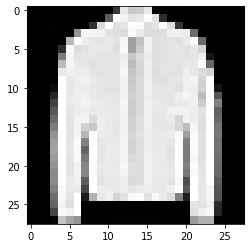

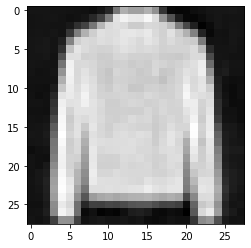

In [54]:
idx = np.random.randint(0, len(X_val_torch))

show_torch_image(X_val_torch[idx])
show_torch_image(predictions[idx].detach())